In [1]:
import librosa
import librosa.display
from os import path
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio
import scipy

In [2]:
def load_file(filename):
    file_path = f'audio/' + filename
    if path.exists(file_path):
        #return tuple
        #data : audio time series -> array
        #sr : sampling rate 
        data, sr = librosa.load(file_path)
        return data, sr
    print(filename + " does not exist !")
    exit(1)
    

In [3]:
samples, sr = load_file("speech1.wav")

In [4]:
print("data shape: ",samples.shape)
print("sampling rate: ",sr)
print("audio duration: ", len(samples)/sr)
Audio('audio/speech1.wav')

data shape:  (514066,)
sampling rate:  22050
audio duration:  23.313650793650794


## Visualizing Audio

This visualization is called the time-domain representation of a given signal. This shows us the loudness (amplitude) of sound wave changing with time. Here amplitude = 0 represents silence.
This amplitude is actually the amplitude of air particles which are oscillating because of the pressure change in the atmosphere due to sound

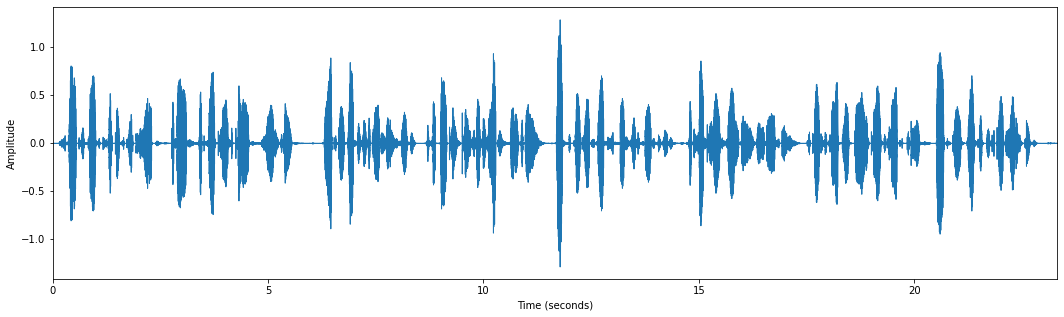

In [5]:
plt.figure(figsize=(18,5))
librosa.display.waveplot(y=samples, sr = sr)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

# Fourier Transform (FT)
To better understand the audio signal, it is necessary to transform it into the frequency-domain. The frequency-domain representation of a signal tells us what different frequencies are present in the signal.
Fourier Transform is a mathematical concept that can convert a continuous signal from time-domain to frequency-domain.
When sound is recorded we only capture the resultant amplitudes of those multiple waves. Fourier Transform is a mathematical concept that can decompose a signal into its constituent frequencies. Fourier transform does not just give the frequencies present in the signal, It also gives the magnitude of each frequency present in the signal.


# Fast Fourier Transform (FFT)
Fast Fourier Transformation(FFT) is a mathematical algorithm that calculates Discrete Fourier Transform(DFT) of a given sequence. The only difference between FT(Fourier Transform) and FFT is that FT considers a continuous signal while FFT takes a discrete signal as input. 

In [6]:
def fft_plot(audio, sr, f_ratio=1):
    ft = np.fft.fft(audio)
    magnitude_spectrum = np.abs(ft)
    #plot magnitude spectrum
    plt.figure(figsize=(18,5))
    frequency = np.linspace(0, sr, len(magnitude_spectrum))
    num_freq_bins = int(len(frequency) * f_ratio)
    plt.plot(frequency[:num_freq_bins], magnitude_spectrum[:num_freq_bins])
    plt.xlabel("Frequencey -->")
    plt.ylabel("Magnitude")
    return plt.show()

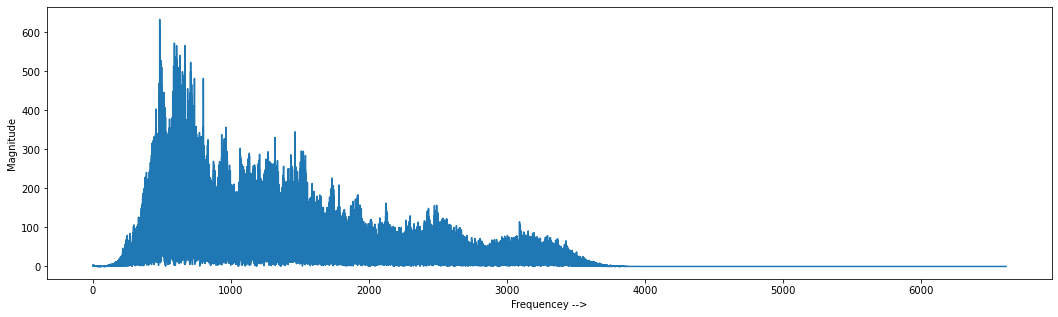

In [7]:
fft_plot(samples,sr,0.3)

# Extracting Shot-Time Fourier Transform
The Short-time Fourier transform (STFT), is a Fourier-related transform used to determine the sinusoidal frequency and phase content of local sections of a signal as it changes over time.In practice, the procedure for computing STFTs is to divide a longer time signal into shorter segments of equal length and then compute the Fourier transform separately on each shorter segment. 

In [8]:
FRAME_SIZE = 2048
HOP_SIZE = 512

In [9]:
S_scale = librosa.stft(samples, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)

# Calculating Spectrogram
Visual representation of frequencies of a given signal with time is called Spectrogram. In a spectrogram representation plot — one axis represents the time, the second axis represents frequencies and the colors represent magnitude (amplitude) of the observed frequency at a particular time. 

In [10]:
Y_scale = np.abs(S_scale) ** 2

# Visulizing the spectrogram

In [11]:
def plot_spectrogram(Y, sr , hop_length, y_axis="linear"):
    plt.figure(figsize=(25,10))
    librosa.display.specshow(Y,hop_length=hop_length,x_axis="time",y_axis=y_axis)
    plt.colorbar(format="%+2.0f dB")

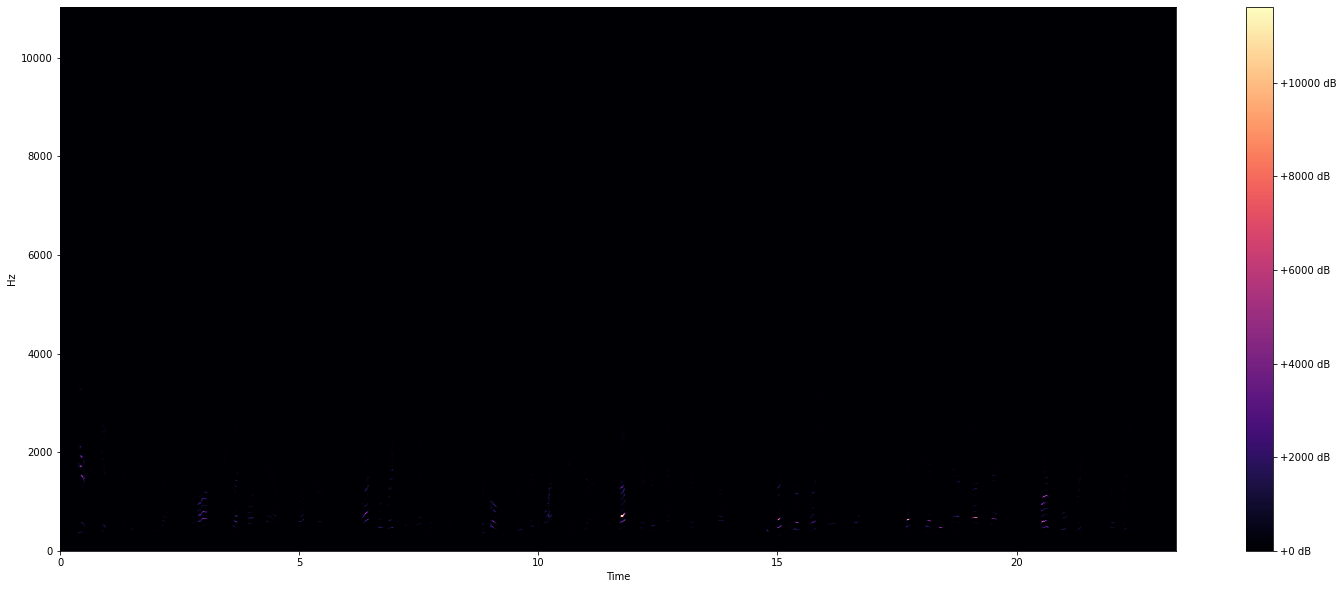

In [12]:
plot_spectrogram(Y_scale, sr, HOP_SIZE)

# Long-Amplitude Spectrogram

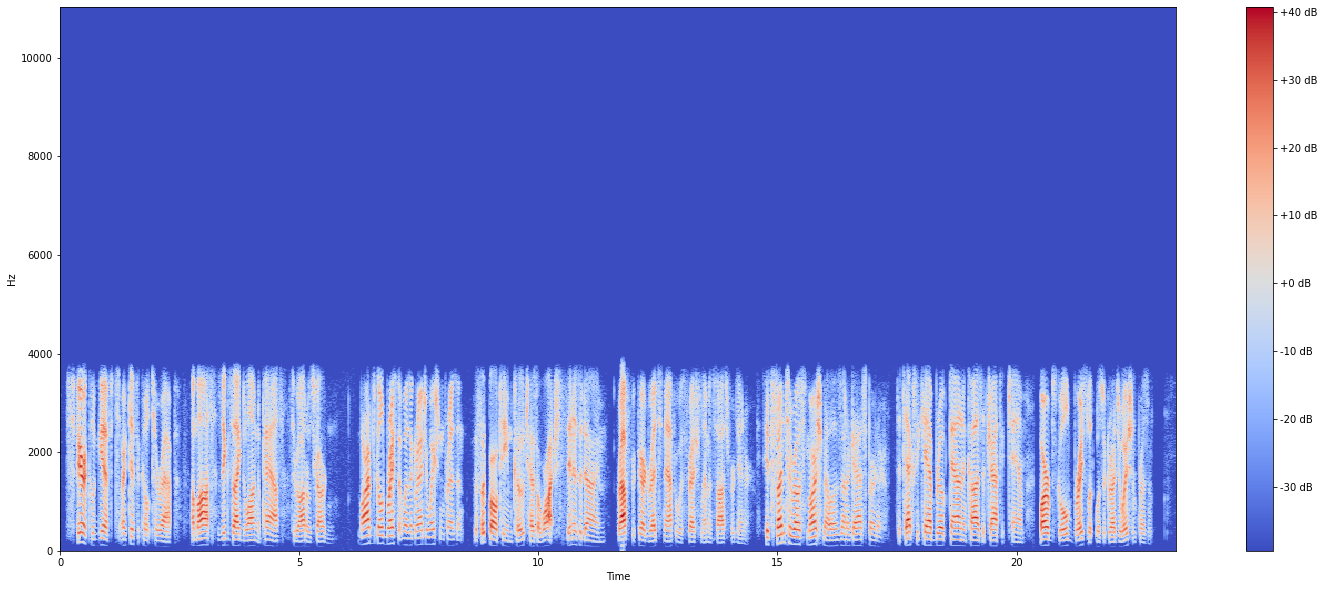

In [13]:
Y_log_scale = librosa.power_to_db(Y_scale)
plot_spectrogram(Y_log_scale,sr, HOP_SIZE)

# Log-Frequency Spectrogram

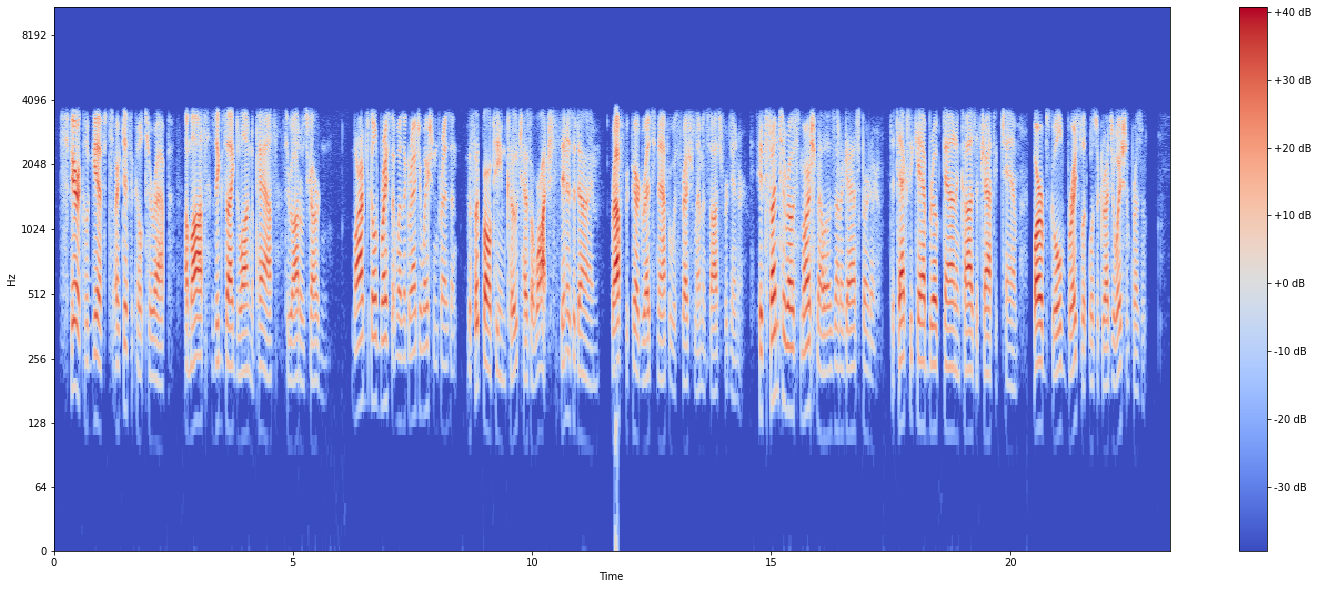

In [14]:
plot_spectrogram(Y_log_scale,sr, HOP_SIZE, y_axis="log")

# Extracting Mel-Spectrogram
The Mel Scale
Studies have shown that humans do not perceive frequencies on a linear scale. We are better at detecting differences in lower frequencies than higher frequencies. For example, we can easily tell the difference between 500 and 1000 Hz, but we will hardly be able to tell a difference between 10,000 and 10,500 Hz, even though the distance between the two pairs are the same.



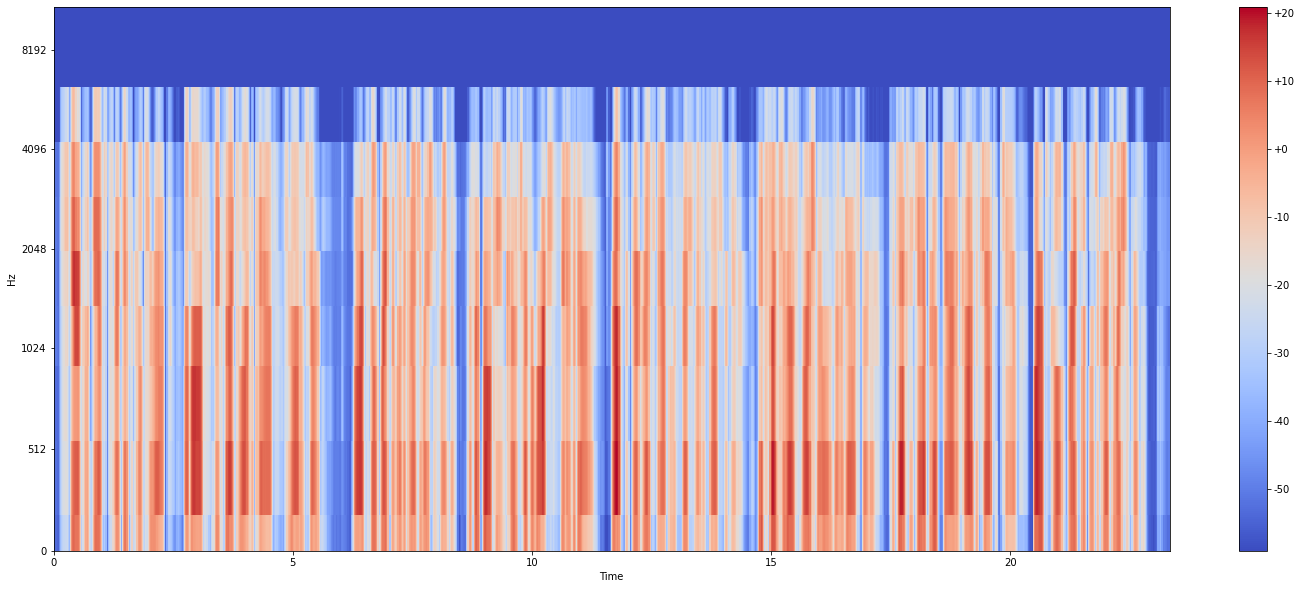

In [17]:
mel_spectrogram = librosa.feature.melspectrogram(samples, sr=sr, n_fft=2048, hop_length=512, n_mels=10)
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
plt.figure(figsize=(25,10))
librosa.display.specshow(log_mel_spectrogram,x_axis="time", y_axis="mel", sr=sr)
plt.colorbar(format="%+2.f")
plt.show()